In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/Indole_-_cytoprotekcja_.xlsx')

 64%|████████████████████████████████████████████████████▏                             | 28/44 [00:01<00:00, 26.65it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:01<00:00, 22.15it/s]


Data size (rows, columns): (44, 1613)
Data size after first reduction (rows, columns): (44, 1433)
Data size after second reduction (rows, columns): (44, 1182)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
    molecular descriptor name  corr_value  absolute correlation value
456                BCUTare-1l    0.345707                    0.345707
520        

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


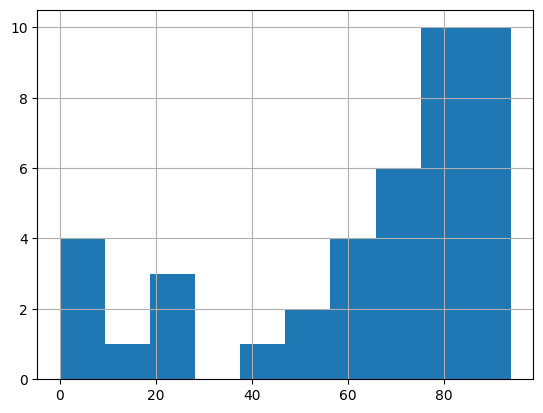

In [4]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 12


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
456,BCUTare-1l,0.345707,0.345707
520,ETA_dEpsilon_D,0.412783,0.412783
829,NaaNH,0.386873,0.386873
831,NaaS,-0.343855,0.343855
899,SaaNH,0.359872,0.359872
901,SaaS,-0.343855,0.343855
913,SlogP_VSA1,0.338615,0.338615
1030,VR1_A,-0.339451,0.339451
1040,VR2_A,-0.339146,0.339146
1126,n6HRing,0.362058,0.362058


In [7]:
with_standarization, train_r2, test_r2, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
    molecular descriptor name  corr_value  absolute correlation value
456                BCUTare-1l    0.345707                    0.345707
520            

In [8]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([ 74.84573835,  74.86607255,  74.85322991,  74.55826237,
        67.9804025 ,  68.49979815,  67.98667053,  69.59526261,
        74.11229412, 101.68243689, 295.53061893,  68.06327033,
        60.30330786,  67.82945052,  60.40953563,  60.42277388,
        67.49660444,  67.5960052 ,  67.72961214,  67.62311507,
        67.93172641,  68.25639013,  67.96291682,  75.17088861,
        67.80982436,  67.6535445 ,  67.44556162,  60.31439553,
        67.6649004 ,  67.70521141,  67.71141075,  67.71649729,
        67.53400574,  67.79133463,  67.70612438,  63.92610393,
        67.66380409,  84.18247923,  79.84000033,  79.92649806,
        86.01965608,  86.07603286,  86.07280496,  74.51267316])

In [9]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])
xs

-1.2176657169786025

## Search inside correlation space

In [10]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))


In [11]:
df_without_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list

In [12]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.25,-29.711361,-8.191889,46
1,0.26,-31.643592,-10.091850,38
2,0.27,-21.557773,-656.794767,30
3,0.28,-0.259866,-27.390631,28
4,0.29,-4.560599,-14.542169,26
5,0.30,-0.086256,-16.568605,21
6,0.31,-0.722452,-16.200423,20
7,0.32,-0.465637,-15.305836,15
8,0.33,-3.508491,-18.053890,12
9,0.34,0.012590,-5.220663,9


In [13]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))

In [14]:
df_with_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_with_standarization['Training data R^2 score'] = second_list
df_with_standarization['Test data R^2 score'] = third_list
df_with_standarization['Number of features'] = f_list

In [15]:
df_with_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.25,0.647643,-0.349974,46
1,0.26,0.622270,-0.496764,38
2,0.27,0.607893,-2.641634,30
3,0.28,0.606383,-2.439998,28
4,0.29,0.582904,-2.294678,26
5,0.30,0.500356,-4.654553,21
6,0.31,0.457527,-9.630552,20
7,0.32,0.415188,-17.500870,15
8,0.33,0.328970,-22.469603,12
9,0.34,0.201321,-21.465842,9


## Plots

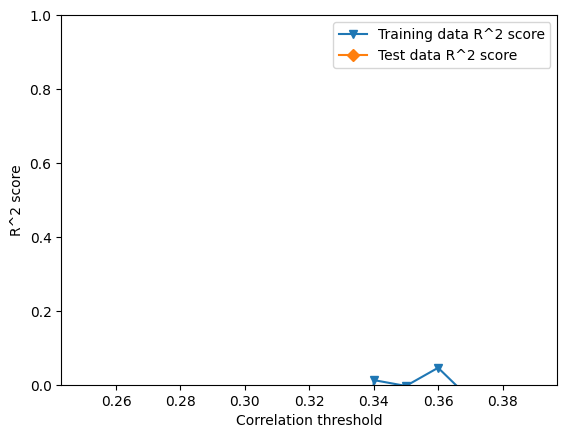

In [16]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

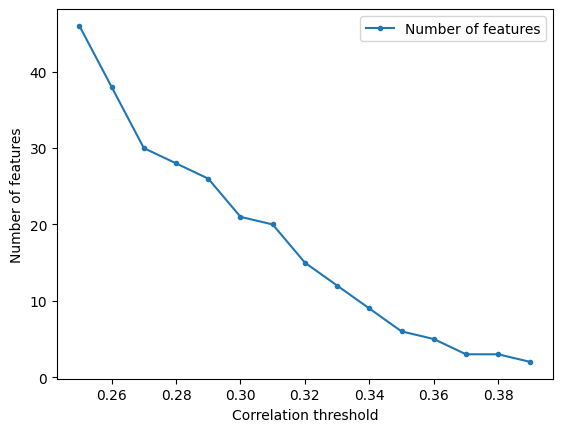

In [17]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## sqrt(R^2)

In [18]:
df_without_standarization['train R value'] = [np.sqrt(x) for x in df_without_standarization['Training data R^2 score']]

In [19]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,train R value
0,0.25,-29.711361,-8.191889,46,NaN
1,0.26,-31.643592,-10.091850,38,NaN
2,0.27,-21.557773,-656.794767,30,NaN
3,0.28,-0.259866,-27.390631,28,NaN
4,0.29,-4.560599,-14.542169,26,NaN
5,0.30,-0.086256,-16.568605,21,NaN
6,0.31,-0.722452,-16.200423,20,NaN
7,0.32,-0.465637,-15.305836,15,NaN
8,0.33,-3.508491,-18.053890,12,NaN
9,0.34,0.012590,-5.220663,9,0.112204


In [20]:
xcz = []
for element in df_without_standarization['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [21]:
df_without_standarization['test R value'] = xcz

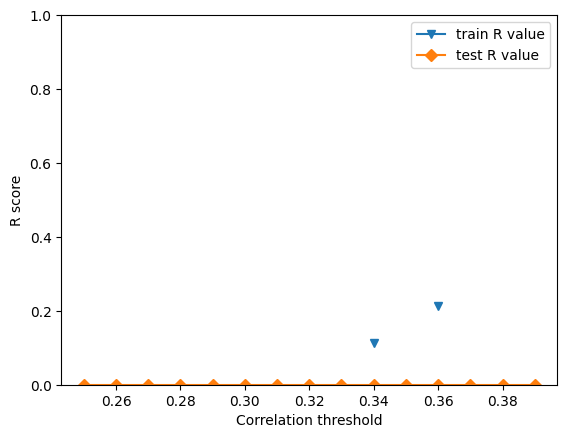

In [22]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

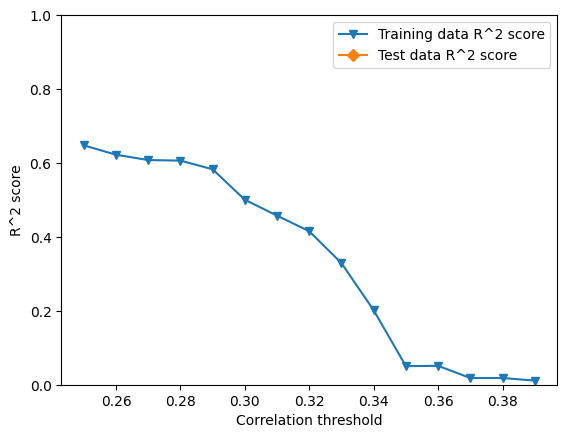

In [25]:
plt.plot(df_with_standarization['Correlation threshold'], df_with_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_with_standarization['Correlation threshold'], df_with_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

## Final model

In [ ]:
stop

In [ ]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                      correlation_threshold = 0.34, 
                                                      standarization = False, 
                                                      model_type = 'linear_model', 
                                                      train_test_split_ = False, 
                                                      verbose = True)

In [ ]:
final_model[0].get_params()

## Predict target feature

In [ ]:
Err

In [ ]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

In [ ]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [ ]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [ ]:
print(len(smiles))
print(len(predicted_activity))

In [ ]:
save_to_df.head()

In [ ]:
save_to_df['Predicted activity'] = predicted_activity

In [ ]:
save_to_df.head()

In [ ]:
#save_to_df.to_excel('../Data/Predicted_activity.xlsx')